Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Practicum, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# Proyecto Integrado 2

Debo preparar un prototipo de un modelo de machine learning para Zyfra, la empresa para la que trabajo. Zyfra desarrolla soluciones de eficiencia para la industria pesada y me han encargado crear un modelo que prediga la cantidad de oro que se puede extraer del mineral de oro. Afortunadamente, tengo acceso a los datos de extracción y purificación necesarios para entrenar el modelo.

Si logro crear un modelo preciso, será de gran ayuda para optimizar la producción y eliminar los parámetros no rentables. 

## Importacion de librerias, visualizacion de datos

In [1]:
#Importamos las librerias que puedan ser necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy import stats as st
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict



<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Para mejorar el código, se pueden implementar las siguientes sugerencias. En primer lugar, es recomendable organizar las importaciones agrupándolas según las respectivas bibliotecas, lo cual facilitará la lectura y navegación del código. Además, es importante eliminar las importaciones no utilizadas y evitar importar bibliotecas completas cuando solo se necesitan módulos o funciones específicas. También se debe prestar atención a las importaciones duplicadas y eliminar las repeticiones innecesarias.
    
</div>


In [2]:
#Guardamos los datasets
train_set = pd.read_csv('/datasets/gold_recovery_train.csv')

test_set = pd.read_csv('/datasets/gold_recovery_test.csv')

full_set = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
#Imprimimos datos sobre los datasets, en orden
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
#Vemos si hay duplicados
train_set.duplicated().sum()

0



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Buen trabajo, siempre es importante verificar duplicados &#128077;
    
</div>


In [5]:
#Vemos si hay valores ausentes
print(train_set.isna().sum())

#Mostramos el total de valores ausentes
print(f'\nTotal missing values in the train set: {train_set.isna().sum().sum()}')

#Proporcion expresada en porcentaje
print(f'\n Proporcion expresada en porcentaje: {(test_set.size) / ((test_set.isna().sum().sum()) * 100)}%')

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

Total missing values in the train set: 30320

 Proporcion expresada en porcentaje: 1.3151186440677967%


In [6]:
#Imprimimos una muestra
train_set

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [7]:
#Imprimimos una descripcion resumida de los datos
train_set.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [8]:
#Seguimos con el resto de datasets
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [9]:
#Vemos si hay duplicados
test_set.duplicated().sum()

0

In [10]:
#Vemos si hay valores ausentes
print(test_set.isna().sum())

#Mostramos el total de valores ausentes
print(f'\nTotal missing values in the test set: {test_set.isna().sum().sum()}')

#Proporcion expresada en porcentaje
print(f'\n Proporcion expresada en porcentaje: {(test_set.size) / ((test_set.isna().sum().sum()) * 100)}%')

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257




<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Excelente utilizar la proporción en expresión
    
</div>


In [11]:
#Imprimimos una muestra
test_set

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [12]:
#Imprimimos una descripcion resumida de los datos
test_set.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [13]:
#Seguimos con el resto de datasets
full_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [14]:
#Vemos si hay duplicados
full_set.duplicated().sum()

0

In [15]:
#Vemos si hay valores ausentes
print(full_set.isna().sum())

#Mostramos el total de valores ausentes
print(f'\nTotal missing values in the full set: {full_set.isna().sum().sum()}')

#Proporcion expresada en porcentaje
print(f'\n Proporcion expresada en porcentaje: {(full_set.size) / ((full_set.isna().sum().sum()) * 100)}%')

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

Total missing values in the full set: 36587

 Proporcion expresada en porcentaje: 0.5401623527482439%


In [16]:
#Imprimimos una muestra
full_set

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Vemos que los tres datasets tienen valores ausentes, por lo que hay que investigar el motivo y poder hallar un modo de tratar con ellos. Tambien vimos que no hay duplicados y los datasets tienen varias columnas

In [17]:
#Imprimimos una descripcion resumida de los datos
full_set.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto, info(), head() y describe() son herramientas esceneciales que nos ayudaran a hacer un análisis exploratorio inicial. Continúa con el buen trabajo! </div>

## Calculo de Recuperacion

In [18]:
#Vemos la columna rougher.output.recovery en el set de entrenamiento y las guardamos en una variable
recovery = (train_set['rougher.output.recovery']).dropna()
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 14287, dtype: float64

In [19]:
#Hacemos el calculo de recuperacion con la formula que nos dieron ((C * (F - T) / (F * (C - T))))
C = train_set['rougher.output.concentrate_au']
F = train_set['rougher.input.feed_au']
T = train_set['rougher.output.tail_au']

#Calculamos la formula de Recuperacion
formula_recovery = ((C * (F - T)) / (F * (C - T)))
formula_recovery = formula_recovery.replace([np.inf, -np.inf], np.nan).dropna()

#Eliminamos valores ausentes
recovery = recovery.dropna()

#Hacemos que ambos arrays tengan el mismo numero de muestras para el calculo
min_length = min(len(recovery), len(formula_recovery))
recovery = recovery[:min_length]
formula_recovery = formula_recovery[:min_length]

#Calculamos el error medio absoluto
mae = mean_absolute_error(recovery, formula_recovery)

#Mostramos
print(f"Mean Absolute Error for recovery formula and actual values: {mae}")


Mean Absolute Error for recovery formula and actual values: 82.0887622754635




<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Expresaste de forma muy clara el requisito de negocio en una f'rmula , felicidades
    
</div>


In [20]:
#Colocamos las columnas del conjunto de entrenamiento y el completo en variables
columns_full = set(full_set.columns)
columns_train = set(train_set.columns)
columns_test = set(test_set.columns)

#Hallamos las columnas faltantes en el conjunto de entrenmiento
missing_columns_train = columns_full - columns_train

#Hallamos las columnas faltantes en el conjunto de prueba
missing_columns_test = columns_full - columns_test

#Mostramos
print("Missing columns in train set:")
for col in missing_columns_train:
    print(col)
    
print("\nMissing columns in test set:")
for col in missing_columns_test:
    col_type = full_set[col].dtype
    print(f"Column: {col}, Data type: {col_type}")

Missing columns in train set:

Missing columns in test set:
Column: rougher.calculation.floatbank10_sulfate_to_au_feed, Data type: float64
Column: rougher.output.concentrate_au, Data type: float64
Column: final.output.concentrate_ag, Data type: float64
Column: rougher.output.tail_sol, Data type: float64
Column: primary_cleaner.output.tail_ag, Data type: float64
Column: final.output.tail_ag, Data type: float64
Column: rougher.output.concentrate_pb, Data type: float64
Column: primary_cleaner.output.concentrate_ag, Data type: float64
Column: rougher.output.tail_pb, Data type: float64
Column: final.output.concentrate_sol, Data type: float64
Column: secondary_cleaner.output.tail_pb, Data type: float64
Column: final.output.tail_au, Data type: float64
Column: rougher.output.recovery, Data type: float64
Column: secondary_cleaner.output.tail_sol, Data type: float64
Column: rougher.calculation.sulfate_to_au_concentrate, Data type: float64
Column: final.output.concentrate_pb, Data type: float64
C

## Preprocesamiento de datos

Teniendo en cuenta que tenemos un dataset con la informacion completa, y siendo este el que puede ser que tenga los valores que no esten en alguno de los otros dos dataframes (test, train), podemos llenar estos valores ausentes y analizar.

In [21]:
#Iteramos sobre cada columna en el train_set
for column in train_set.columns:
    #Condicionamos si la columna esta en ambos datasets
    if column in full_set.columns:
        #Conseguimos la serie correspondiente
        full_series = full_set[column]
        #Rellenamos los valores ausentes con los valores del dataset completo
        train_set[column] = train_set[column].fillna(full_series)

#Mostramos ahora los datos ausentes habiendo sido reemplazados si es posible
print(train_set.isna().sum().sum())
print(test_set.isna().sum().sum())
print(train_set.size)

full_set = full_set.dropna()
train_set = train_set.dropna()
test_set = test_set.dropna()

print(f'\nFull set missing values: {full_set.isna().sum().sum()}')
print(f'Train set missing values: {train_set.isna().sum().sum()}')
print(f'Test set missing values: {test_set.isna().sum().sum()}')

12298
2360
1466820

Full set missing values: 0
Train set missing values: 0
Test set missing values: 0


Ahora si que ya rellenamos aquellos valores ausentes que estaban presentes en el dataset completo, considero que lo mas optimo es eliminar aquellos datos ausentes por los siguientes motivos: 

Realmente no eran una cantidad significante, por lo tanto, no iba a afectar de manera exponencial a los resultados del analisis. Y en caso de querer imputar los datos con medias o medianas, considero que puede desviar los datos de la investigacion, pues trabajaria con suposiciones mas que valores reales, dando numeros ficticios a el modelo para poder trabajar. Los valores ausentes pueden siginificar algo, por lo que prefiero trabajar sin ellos pero dejar constancia de el por que.

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto,continúa con el buen trabajo! </div>

## Analisis de datos

In [22]:
#Observemos como cambia la concentracion de metales en la etapa de purificacion
pb_before = full_set['rougher.output.concentrate_pb'].sum()
au_before = full_set['rougher.output.concentrate_au'].sum()
ag_before = full_set['rougher.output.concentrate_ag'].sum()

pb_after = full_set['final.output.concentrate_pb'].sum()
au_after = full_set['final.output.concentrate_au'].sum()
ag_after = full_set['final.output.concentrate_ag'].sum()

#Veamos antes de la purificacion (concentrado rougher)
print(f'Lead concentrate before purification process: {pb_before}')
print(f'Gold concentrate before purification process: {au_before}')
print(f'Silver concentrate before purification process: {ag_before}')

#Veamos despues de la purificacion
print(f'\nLead concentrate after purification process: {pb_after}')
print(f'Gold concentrate after purification process: {au_after}')
print(f'Silver concentrate after purification process: {ag_after}')

Lead concentrate before purification process: 121559.51401009138
Gold concentrate before purification process: 322719.3339644403
Silver concentrate before purification process: 194495.1025507589

Lead concentrate after purification process: 160901.26927563234
Gold concentrate after purification process: 713083.8974895219
Silver concentrate after purification process: 83543.56264870794


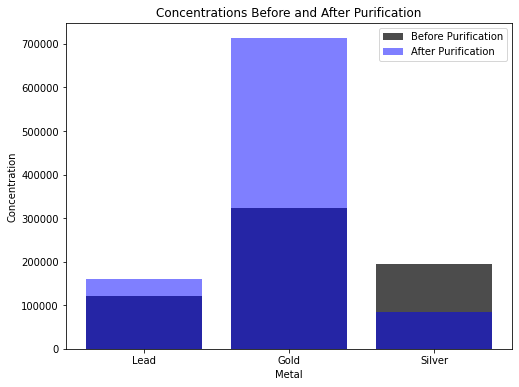

In [23]:
#Creamos una lista con los nombres de los metales
metals = ['Lead', 'Gold', 'Silver']

#Creamos una lista con las concentraciones antes y despues de la purificacion
concentrations_before = [pb_before, au_before, ag_before]
concentrations_after = [pb_after, au_after, ag_after]

#Configuramos los axes y figura
fig, ax = plt.subplots(figsize=(8, 6))

#Creamos el histograma de antes de la purificacion
ax.bar(metals, concentrations_before, alpha=0.7, color='black', label='Before Purification')

#Creamos el histograma de despues de la purificacion
ax.bar(metals, concentrations_after, alpha=0.5,color='blue', label='After Purification')

#Ponemos las etiquetas y ejes
ax.set_xlabel('Metal')
ax.set_ylabel('Concentration')
ax.set_title('Concentrations Before and After Purification')

#Agregamos leyenda
ax.legend()

#Mostramos
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Muy clara la visualización! </div>

In [24]:
#Veamos la distribucion de particulas de alimentacion en el conjunto de prueba y entrenamiento
train_feed = train_set['rougher.input.feed_size'].sum()

test_feed = test_set['rougher.input.feed_size'].sum()

print(f'Train particles: {train_feed}')
print(f'\nTest particles: {test_feed}')
print(f'\nTrain and test particles difference: {train_feed - test_feed}')

Train particles: 893534.8300920501

Test particles: 303270.9218098419

Train and test particles difference: 590263.9082822083


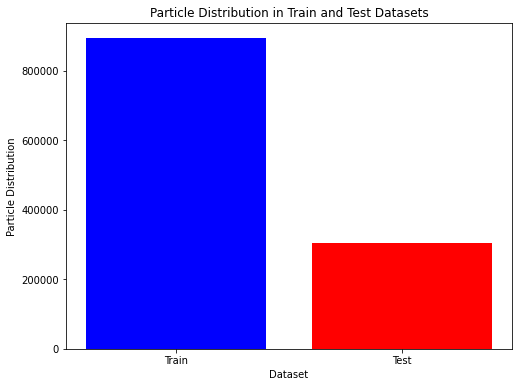

In [25]:
#Configuramos la figura y el axis
fig, ax = plt.subplots(figsize=(8, 6))

#Creamos el histograma para las particulas
ax.bar(['Train', 'Test'], [train_feed, test_feed], color=['blue', 'red'])

#Configuramos las etiquetas y ejes
ax.set_xlabel('Dataset')
ax.set_ylabel('Particle Distribution')
ax.set_title('Particle Distribution in Train and Test Datasets')

#Mostramos
plt.show()

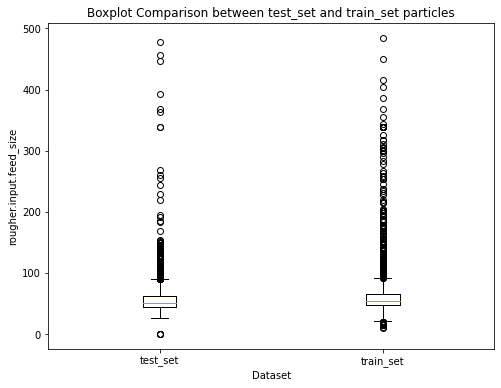

In [26]:
#Configuramos la figura y axis
fig, ax = plt.subplots(figsize=(8, 6))

#Creamos una lista para el diagrama de caja y bigotes
data_bp = [test_set['rougher.input.feed_size'], train_set['rougher.input.feed_size']]

#Creamos el boxplot
bp = ax.boxplot(data_bp)

#Configuramos el eje X
ax.set_xticklabels(['test_set', 'train_set'])

#Agregamos titulo y nombre de ejes
ax.set_xlabel('Dataset')
ax.set_ylabel('rougher.input.feed_size')
ax.set_title('Boxplot Comparison between test_set and train_set particles')

#Mostramos
plt.show()

Ahora veremos las diferentes concentraciones en diferentes etapas de los concentrados: materia prima, concentrado rougher y concentrado final. Queremos analizar si hay valores atipicos, ver si afectan los datos, y si es asi eliminarlos o tratarlos.

Vemos que el train_set y test_set no comparten las mismas caracteristicas/columnas que son primordiales para el analsis del modelo en la celda numero 20, por lo que podria trabajar sobre estos conjuntos, pero es preferible sacar nuevos conjuntos de prueba y entrenamiento que compartan las mismas caracteristicas, para facilitar el funcionamiento del modelo.

De todas maneras se podria ayudar utilizando las fechas como indices para poder agregar las columnas al test_set, pero es preferible usar un nuevo conjunto de datos ya que no se nos es especifico que se use como tal el conjunto de prueba y prueba proveidos. Si queremos poder tener un trabajo mas facil de leer y analizar, es preferible la opcion que tomamos.

In [27]:
train_set_1, test_set_1 = train_test_split(full_set, test_size=0.5, random_state=42)

print("Number of samples in the train_set:", len(train_set_1))
print("Number of samples in the test_set:", len(test_set_1))

Number of samples in the train_set: 8047
Number of samples in the test_set: 8047


Ahora podemos tratar tambien los valores atipicos en el tamaño de particulas

In [28]:
#Calculamos los zscore de train_set_1
outlier_threshold = 3
train_set_1_zscores = zscore(train_set_1['rougher.input.feed_size'])
train_set_1 = train_set_1[(train_set_1_zscores > -outlier_threshold) & (train_set_1_zscores < outlier_threshold)] #Eliminamos

#Calculamos los zscore de test_set_1
test_set_1_zscores = zscore(test_set_1['rougher.input.feed_size'])
test_set_1 = test_set_1[(test_set_1_zscores > -outlier_threshold) & (test_set_1_zscores < outlier_threshold)] #Eliminamos

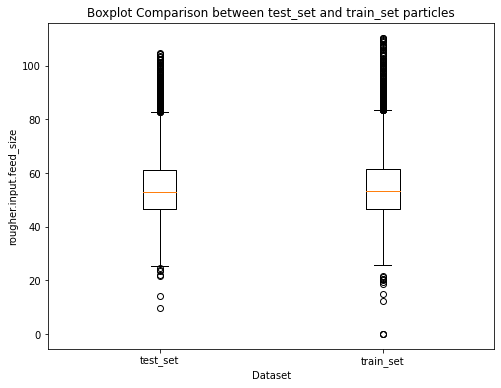

In [29]:
#Configuramos la figura y axis
fig, ax = plt.subplots(figsize=(8, 6))

#Creamos una lista para el diagrama de caja y bigotes
data_bp = [test_set_1['rougher.input.feed_size'], train_set_1['rougher.input.feed_size']]

#Creamos el boxplot
bp = ax.boxplot(data_bp)

#Configuramos el eje X
ax.set_xticklabels(['test_set', 'train_set'])

#Agregamos titulo y nombre de ejes
ax.set_xlabel('Dataset')
ax.set_ylabel('rougher.input.feed_size')
ax.set_title('Boxplot Comparison between test_set and train_set particles')

#Mostramos
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto! excelente uso de los boxplot</div>

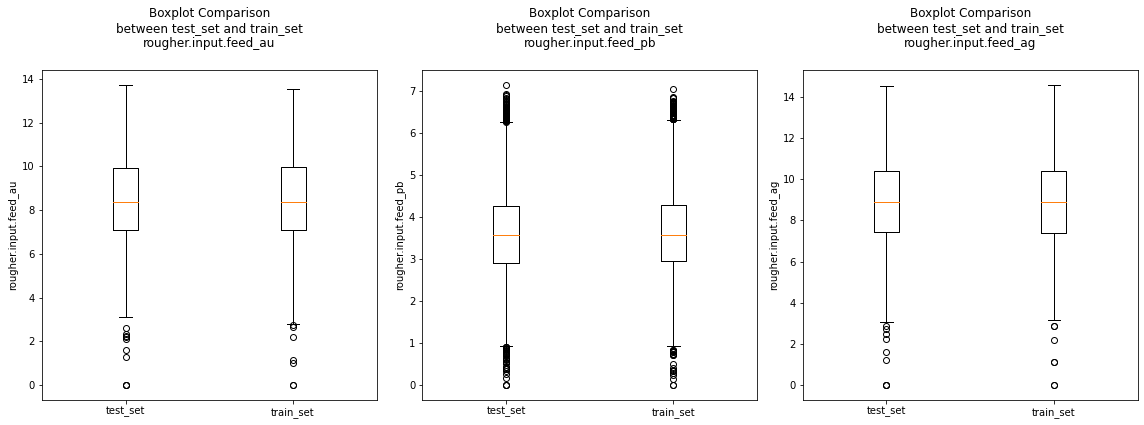

In [30]:
#Columnas que usaremos
columns_raw = ['rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_ag']

#Configuramos la figura y axis
fig, axs = plt.subplots(1, len(columns_raw), figsize=(16, 6))

#Iteramos sobre las columnas
for i, column in enumerate(columns_raw):
    #Creamos una lista para el diagrama de caja
    data_bp = [test_set_1[column], train_set_1[column]]
    
    #Creamos el diagrama de caja
    bp = axs[i].boxplot(data_bp)
    
    #Configuramos el eje de X
    axs[i].set_xticklabels(['test_set', 'train_set'])
    
    #Hacemos que la columna sea la etiqueta de Y
    axs[i].set_ylabel(column)
    
    #Ponemos el titulo y configurar el titulo
    axs[i].set_title(f'Boxplot Comparison\nbetween test_set and train_set\n{column}', y=1.05)
    
#Ajustamos el espacio entre cada diagrama
plt.tight_layout()

#Mostramos
plt.show()

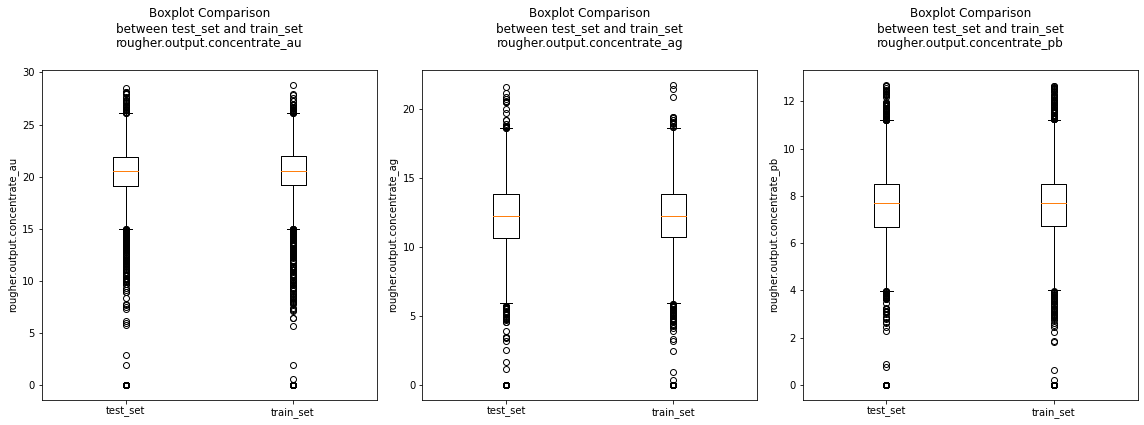

In [31]:
#Columnas que usaremos de materia prima
columns_rougher = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']

#Configuramos la figura y axis
fig, axs = plt.subplots(1, len(columns_rougher), figsize=(16, 6))

#Iteramos sobre las columnas
for i, column in enumerate(columns_rougher):
    #Creamos una lista para el diagrama de caja
    data_bp = [test_set_1[column], train_set_1[column]]
    
    #Creamos el diagrama de caja
    bp = axs[i].boxplot(data_bp)
    
    #Configuramos el eje de X
    axs[i].set_xticklabels(['test_set', 'train_set'])
    
    #Hacemos que la columna sea la etiqueta de Y
    axs[i].set_ylabel(column)
    
    #Ponemos el titulo y configurar el titulo
    axs[i].set_title(f'Boxplot Comparison\nbetween test_set and train_set\n{column}', y=1.05)
    
#Ajustamos el espacio entre cada diagrama
plt.tight_layout()

#Mostramos
plt.show()

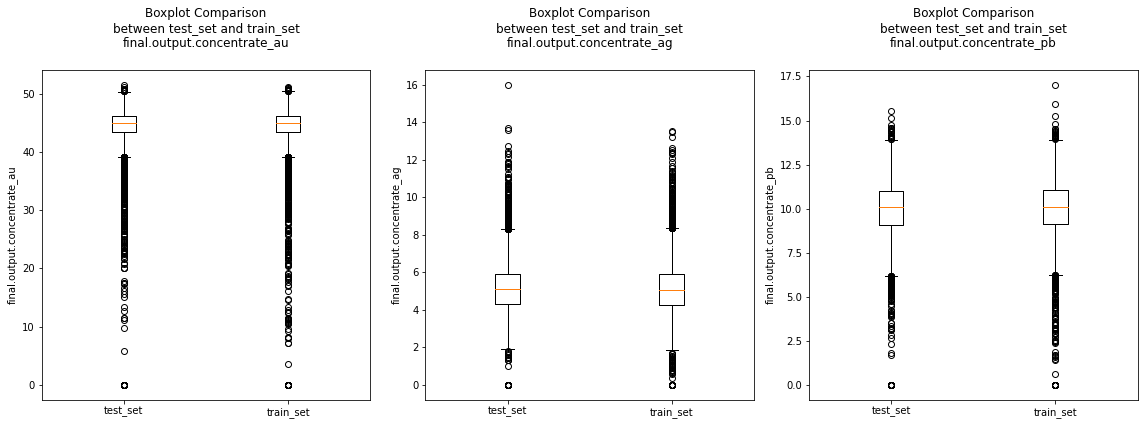

In [32]:
#Columnas que usaremos de materia prima
columns_final = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']

#Configuramos la figura y axis
fig, axs = plt.subplots(1, len(columns_final), figsize=(16, 6))

#Iteramos sobre las columnas
for i, column in enumerate(columns_final):
    #Creamos una lista para el diagrama de caja
    data_bp = [test_set_1[column], train_set_1[column]]
    
    #Creamos el diagrama de caja
    bp = axs[i].boxplot(data_bp)
    
    #Configuramos el eje de X
    axs[i].set_xticklabels(['test_set', 'train_set'])
    
    #Hacemos que la columna sea la etiqueta de Y
    axs[i].set_ylabel(column)
    
    #Ponemos el titulo y configurar el titulo
    axs[i].set_title(f'Boxplot Comparison\nbetween test_set and train_set\n{column}', y=1.05)
    
#Ajustamos el espacio entre cada diagrama
plt.tight_layout()

#Mostramos
plt.show()

In [33]:
outlier_threshold = 3

# Iterate over the columns in each list
for columns in [columns_final, columns_rougher, columns_raw]:
    # Iterate over the columns
    for column in columns:
        # Calculate z-scores for train set
        train_zscores = zscore(train_set_1[column])
        train_set_1 = train_set_1[(train_zscores > -outlier_threshold) & (train_zscores < outlier_threshold)]
        
        # Calculate z-scores for test set
        test_zscores = zscore(test_set_1[column])
        test_set_1 = test_set_1[(test_zscores > -outlier_threshold) & (test_zscores < outlier_threshold)]

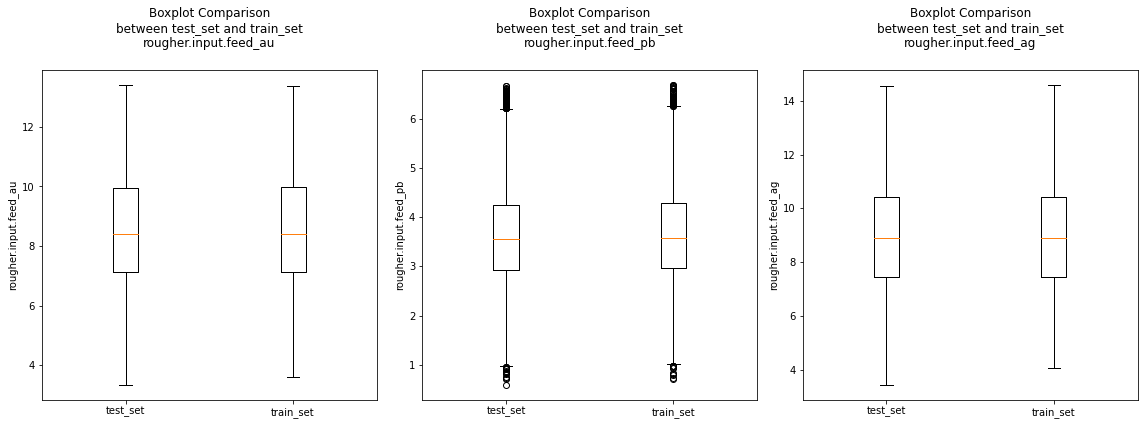

In [34]:
#Columnas que usaremos
columns_raw = ['rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_ag']

#Configuramos la figura y axis
fig, axs = plt.subplots(1, len(columns_raw), figsize=(16, 6))

#Iteramos sobre las columnas
for i, column in enumerate(columns_raw):
    #Creamos una lista para el diagrama de caja
    data_bp = [test_set_1[column], train_set_1[column]]
    
    #Creamos el diagrama de caja
    bp = axs[i].boxplot(data_bp)
    
    #Configuramos el eje de X
    axs[i].set_xticklabels(['test_set', 'train_set'])
    
    #Hacemos que la columna sea la etiqueta de Y
    axs[i].set_ylabel(column)
    
    #Ponemos el titulo y configurar el titulo
    axs[i].set_title(f'Boxplot Comparison\nbetween test_set and train_set\n{column}', y=1.05)
    
#Ajustamos el espacio entre cada diagrama
plt.tight_layout()

#Mostramos
plt.show()

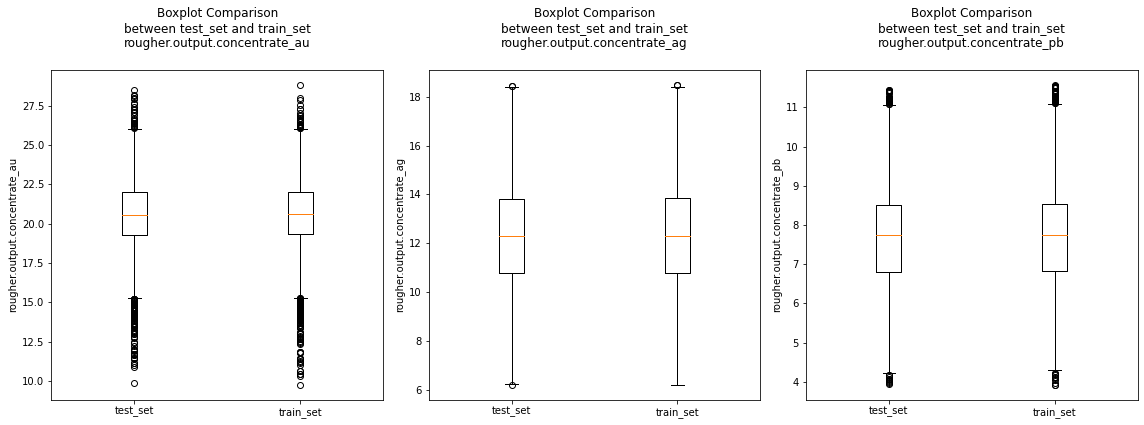

In [35]:
#Columnas que usaremos de materia prima
columns_rougher = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']

#Configuramos la figura y axis
fig, axs = plt.subplots(1, len(columns_rougher), figsize=(16, 6))

#Iteramos sobre las columnas
for i, column in enumerate(columns_rougher):
    #Creamos una lista para el diagrama de caja
    data_bp = [test_set_1[column], train_set_1[column]]
    
    #Creamos el diagrama de caja
    bp = axs[i].boxplot(data_bp)
    
    #Configuramos el eje de X
    axs[i].set_xticklabels(['test_set', 'train_set'])
    
    #Hacemos que la columna sea la etiqueta de Y
    axs[i].set_ylabel(column)
    
    #Ponemos el titulo y configurar el titulo
    axs[i].set_title(f'Boxplot Comparison\nbetween test_set and train_set\n{column}', y=1.05)
    
#Ajustamos el espacio entre cada diagrama
plt.tight_layout()

#Mostramos
plt.show()

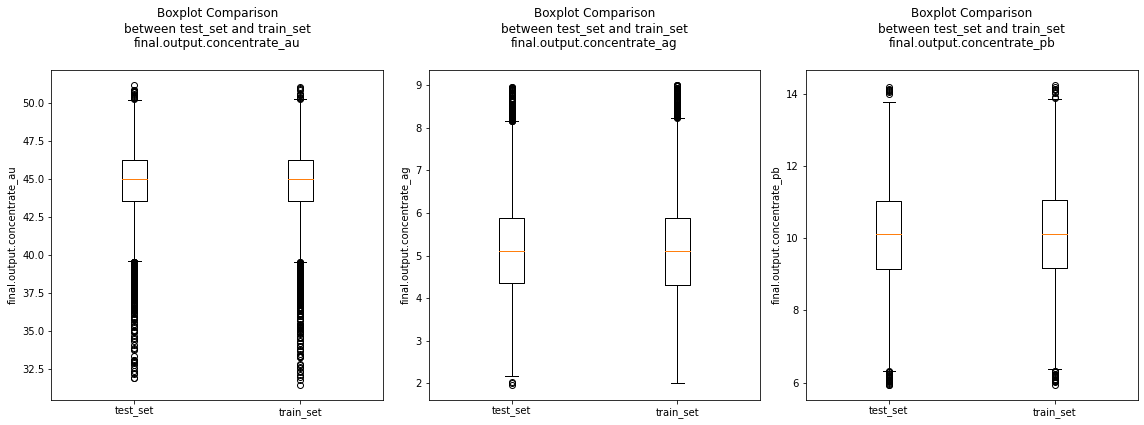

In [36]:
#Columnas que usaremos de materia prima
columns_final = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']

#Configuramos la figura y axis
fig, axs = plt.subplots(1, len(columns_final), figsize=(16, 6))

#Iteramos sobre las columnas
for i, column in enumerate(columns_final):
    #Creamos una lista para el diagrama de caja
    data_bp = [test_set_1[column], train_set_1[column]]
    
    #Creamos el diagrama de caja
    bp = axs[i].boxplot(data_bp)
    
    #Configuramos el eje de X
    axs[i].set_xticklabels(['test_set', 'train_set'])
    
    #Hacemos que la columna sea la etiqueta de Y
    axs[i].set_ylabel(column)
    
    #Ponemos el titulo y configurar el titulo
    axs[i].set_title(f'Boxplot Comparison\nbetween test_set and train_set\n{column}', y=1.05)
    
#Ajustamos el espacio entre cada diagrama
plt.tight_layout()

#Mostramos
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Felicidades, tu exploración gráfica ha sido muy detallada.  </div>

## Creacion de formula sMAPE y modelos

In [37]:
def final_smape(target, prediction):
    # Función interna
    def smape(target,prediction):
        smape_int = np.mean((np.abs(target - prediction)/((np.abs(target)+np.abs(prediction))/2))) * 100
        return smape_int
    
    # Calculo de smape final para Rougher[0] y Final[1]
    smape_rougher = smape(target.iloc[:,0], prediction[:,0]) 
    smape_final   = smape(target.iloc[:,1], prediction[:,1]) 
    final_smape   = (0.25 * smape_rougher) + (0.75 * smape_final)

    return final_smape

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto! </div>

In [ ]:
def final_smape_rf(target, prediction):<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto, info(), head() y describe() son herramientas esceneciales que nos ayudaran a hacer un análisis exploratorio inicial. Continúa con el buen trabajo! </div>
    # Función interna
    def smape(target,prediction):
        smape_int = np.mean((np.abs(target - prediction)/((np.abs(target)+np.abs(prediction))/2))) * 100
        return smape_int
    
    # Calculo de smape final para Rougher[0] y Final[1]
    smape_rougher = smape(target[:,0], prediction[:,0]) 
    smape_final   = smape(target[:,1], prediction[:,1]) 
    final_smape   = (0.25 * smape_rougher) + (0.75 * smape_final)

    return final_smape

In [39]:
#Hacemos las caracteristicas y objetivos del concentrado rougher para el sMAPE

#Eliminamos la columna 'date' que no proporciona informacion relevante
train_set_1 = train_set_1.drop(['date'], axis=1)
test_set_1 = test_set_1.drop(['date'], axis=1)

#Creamos los target y features del conjunto de entrenamiento
target = train_set_1[['rougher.output.concentrate_au', 'final.output.concentrate_au']]
features = train_set_1.drop(['rougher.output.concentrate_au', 'final.output.concentrate_au'], axis=1)

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto! </div>

### Regresion Lineal

Para este analisis vamos a escoger como modelo la regresion lineal por las siguientes razones:

Es un modelo simple e interpretable, por lo que no necesita tanta complejidad y es fiable. Es un buen punto para poder indicar una relacion lineal entre las caracteristicas y objetivos (features, target).

Y tambien importante, es el modelo que nos ayuda mas con este tipo de casos, pues arboles y bosques de clasificacion no serian apropiados para este analisis porque el objetivo de esos modelos no coincide con lo que buscamos.

In [40]:
#Creamos modelos de regresion lineal para rougher y final
regressor = LinearRegression()

#Hacemos la validacion cruzada
scores_cv = cross_val_score(regressor, features, target, cv=5, scoring= make_scorer(final_smape))
mean_smape = scores_cv.mean()

print("Mean sMAPE:", mean_smape)

Mean sMAPE: 2.1194856652302403


In [41]:
test_features = test_set_1.drop(['rougher.output.concentrate_au', 'final.output.concentrate_au'], axis=1)
test_target = test_set_1[['rougher.output.concentrate_au', 'final.output.concentrate_au']]

#Entrenamos
regressor.fit(features, target)

#Hacemos las predicciones
predictions = regressor.predict(test_features)

#Calculamos el sMAPE
smape_test = final_smape(test_target, predictions)
print("sMAPE on the test set:", smape_test)

sMAPE on the test set: 2.1008220379935567


In [42]:
# Create a Random Forest Regressor model
regressor_f = RandomForestRegressor()

scores = cross_val_score(regressor_f, features, target, cv=5, scoring= make_scorer(final_smape))

# Calculate mean absolute error
mean_smape_rf = scores.mean()

# Print the mean absolute error
print("Mean sMAPE", mean_smape_rf)

Mean sMAPE 1.806951714090704


In [43]:
#Entrenamos el mejor modelo
regressor_f.fit(features, target)

#Hacemos las predicciones con el cojunto de prueba
test_features = test_set_1.drop(['rougher.output.concentrate_au', 'final.output.concentrate_au'], axis=1)
predictions_2 = regressor_f.predict(test_features)

#Calculamos el sMAPE  en el conjunto de prueba
smape_2 = final_smape_rf(test_set_1[['rougher.output.concentrate_au', 'final.output.concentrate_au']].values, predictions_2)
print("sMAPE on the test set:", smape_2)

sMAPE on the test set: 1.6788434308408853


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>

¡Felicidades por completar esta sección con éxito! Has hecho un gran trabajo. Los valores esperados para esta sección se han cumplido con éxito gracias a tu dedicación y esfuerzo. Continúa así y sigue aprendiendo, ¡estoy seguro de que tendrás éxito en todo lo que te propongas!</div>


Podemos ver en esta etapa que el modelo mas efectivo fue el de bosque de regresion. Puede que tarde mas, pero es mas preciso y efectivo. Teniendo en cuenta que el sMAPE va de un 0% a 100%, podemos ver que las medidas han tenido buenos resultados en  general, claramente destacando el de bosque de regresion. Al final probamos utilizando la muestra de prueba y los resultados fueron mas exitosos que en el entrenamiento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>

¡Felicidades por completar esta sección con éxito! Has hecho un gran trabajo. Los valores esperados para esta sección se han cumplido con éxito gracias a tu dedicación y esfuerzo. Continúa así y sigue aprendiendo, ¡estoy seguro de que tendrás éxito en todo lo que te propongas!</div>


# Conclusion Final

Al darnos tres dataframes pudimos analizarlos, importar librerias pertinentes para el analisis de estos, y preprocesar los datos en ellos. Luego pudimos ver al analizarlos que habian muchas inconsistencias en lo que se refiere a los datos ausentes, columnas que no coinciden para el analisis de ambos dataframes (train_set, test_set), pues el de prueba (test_set) no tenia suficientes columnas para poder hacer un analisis adecuado.

Al tener considerado estas limitaciones, se decidio optar por crear nuevos sets de entrenamiento y prueba (train_set_1, test_set_1), ya que el objetivo de la investigacion no parte por tener muestras especificas, si no por optimizar los gastos y tratar un modelo con mejor medidas de precision. Al haccer los nuevos conjuntos, se eliminaron valores atipicos en varios procesos, como son las particulas, materias primas, concentracion rougher, y concentracion final. Despues de finalizar con esto, pudimos proceder a el uso de modelos de Machine Learning, que en este caso, los mas optimos eran aquellos que puedan determinar un tipo de regresion, pues los clasificadores no eran pertinentes para el estudio. Hicimos la formula de sMAPE y sMAPE final, luego declaramos las variables de caracteristicas y objetivo (features, target) y trabajamos sobre ellas. 

Para finalizar pudimos ver que los mejores resultados fueron del modelo de bosque de regresion (RandomForestRegressor), el cual obtuvo una medida de error porcentual bastante reducida (1.68%). Por estos motivos se considera que el analisis de los datos fue exitoso y se pudo tener un modelo que superara las medidas y requisitos impuestos.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Gracias por enviar tu proyecto. Has hecho un excelente trabajo. 
Has respondido correctamente a la mayoría de las preguntas.

Destaco de tu trabajo que has sido muy extenso en las descripciones de datos y en la exploración gráfica. Tú trabajo queda aprobado. 

    
Ánimo, estoy seguro de que vas por un muy buen camino.


Gracias por tu trabajo. &#128077;
    
</div>
